In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv("flight data.csv")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

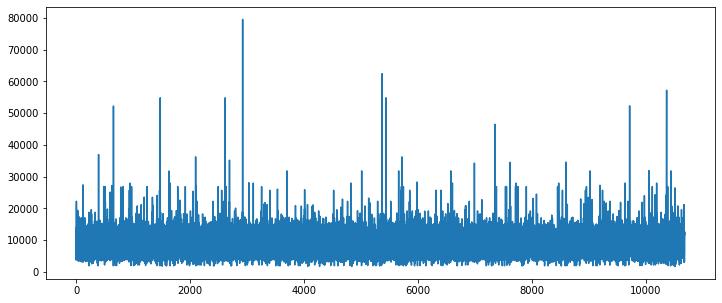

In [7]:
df['Price'].plot(figsize=(12,5))

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-value:",dftest[1])
    print("3.No of Lags",dftest[2])
    print("4.no of observation used for ADF Regression and critical values for calculation",dftest[3])
    print("5.crtical value:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [12]:
ad_test(df["Price"])

1. ADF:  -103.47797676693109
2. P-value: 0.0
3.No of Lags 0
4.no of observation used for ADF Regression and critical values for calculation 10682
5.crtical value:
	 1% : -3.4309623265422866
	 5% : -2.8618106138100194
	 10% : -2.566914042591812


In [13]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 9.9 MB 47.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [14]:
rollmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rollmean,rolstd)

             Price
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
...            ...
10678  9662.083333
10679  9083.583333
10680  7917.750000
10681  8144.333333
10682  8172.833333

[10683 rows x 1 columns]              Price
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
...            ...
10678  5645.423399
10679  5838.514233
10680  4419.295154
10681  4597.884144
10682  4620.975317

[10683 rows x 1 columns]


In [15]:
### rolling statistics
orig = plt.plot(df2,color='blue',label='Original')
mean = plt.plot(rollmean, color='red',label='rollmean')
std = plt.plot(rolstd,color='black',label='rolstd')
plt.legend(loc='best')
plt.title('rolling means and standard deviation')
plt.show(block=False)


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    ### determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    ## plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    ## perform Dickey Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-value:",dftest[1])
    print("3.No of Lags",dftest[2])
    print("4.no of observation used for ADF Regression and critical values for calculation",dftest[3])
    print("5.crtical value:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

TypeError: ignored

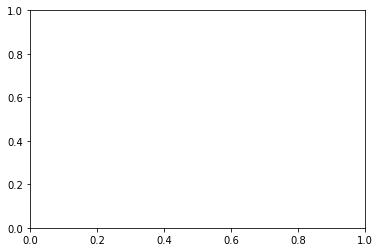

In [20]:
### rolling statistics
orig = plt.plot(df,color='blue',label='Original')
mean = plt.plot(rollmean, color='red',label='rollmean')
std = plt.plot(rolstd,color='black',label='rolstd')
plt.legend(loc='best')
plt.title('rolling means and standard deviation')
plt.show(block=False)


In [ ]:
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [ ]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
### remove nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

In [22]:
from pmdarima import auto_arima
##ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(datasetLogScaleMinusMovingAverage['Price'], trace=True,suppress_warnings=True)
stepwise_fit.summary()